In [1]:
import numpy as np
#import pandas as pd
from matplotlib import pyplot as plt
#from matplotlib.ticker import AutoMinorLocator, MaxNLocator, FormatStrFormatter, MultipleLocator
from matplotlib.ticker import AutoMinorLocator, LogLocator
from cycler import cycler
import yaml
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
#%% Plotting parameters

DPI_SAVE = 600
DPI_PLOT = 150
# typical one column figure width
FIG_WIDTH = 3.4 #8.636 cm

In [3]:
# load styles

plt.style.use('./pv-textbook_inigo.mplstyle')

In [4]:
# load colors

with open('./colors.yaml') as f:
    content = f.read()
    print (content)

colors = {}
yaml_file = open("./colors.yaml", 'r')
yaml_content = yaml.safe_load(yaml_file)
for key, value in yaml_content.items():
    colors[key] = value

colorlist = [colors[key] for key in colors]
plt.rcParams['axes.prop_cycle'] = cycler(color=colorlist)

# Default colors for the book "Fundamentals of Solar Cells 
# and Photovoltaic Systems Engineering"

color1 : '#5FA1D8' #ligthblue
color2 : '#B31F20' #darkred
color3 : '#498F34' #green
color4 : '#EBD741' #darkyellow
color5 : '#F18B45' #orange
color6 : '#002060' #darkblue
color7 : '#55B99D' #turqoise
color8 : '#BDC554' #yellowgreen
color9 : '#4472C4' #blue
color10 : '#B9DEF3' #verylightblue
color11 : 'black'  #black
color12 : '#BDBDBD' #lightgray
color13 : '#696969' #gray
color14 : '#CD853F' #brown
color15 : '#FF7F50' #lightpink


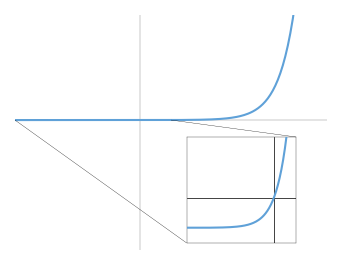

In [5]:
j0=-1e-4
def iv(x):
    return j0*(np.exp(x/0.026) - 1)
v=np.linspace(-1,1,1000)
i = iv(v)
il= 1

fig = plt.figure(figsize=(0.7*FIG_WIDTH, 0.55*FIG_WIDTH), dpi=DPI_PLOT)

x_lim = -0.2,0.3
y_lim = -1.6,1.3

ax1 = fig.add_subplot(111)
ax1.plot(v, -i, c=colors['color1'], lw=1, zorder=3)
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.axvline(0, lw=0.1, c=colors['color11'])
ax1.axhline(0, lw=0.1, c=colors['color11'])
ax1.axis('off')

axins = ax1.inset_axes([0.55, 0.03, 0.35, 0.45])
axins.plot(v, -i, c=colors['color1'], lw=1, zorder=3)
axins.set_xticks([])
axins.set_yticks([])
for axis in ['top','bottom','left','right']:
    axins.spines[axis].set_linewidth(0.15)
axins.set_xlim(-0.2, 0.05)
axins.set_ylim(1.5*j0, -2*j0)
axins.axvline(0, lw=0.35, c=colors['color11'])
axins.axhline(0, lw=0.35, c=colors['color11'])
#axins.axis('off')
axins.set_xticklabels([])
axins.set_yticklabels([])

#ax1.indicate_inset_zoom(axins, edgecolor="black", lw=0.3)
mark_inset(ax1, axins, loc1=1, loc2=3, lw=0.15, fc="none", ec='k', zorder=1)

plt.tight_layout()

#plt.savefig ('./iv_dark.png', dpi=DPI_SAVE)